In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

In [34]:
df = pd.read_csv('03202024_USAjobposting_eli.csv')
pd.set_option('display.max_columns', None)

/var/folders/my/k8vfhbn90612lmd_2_zn09jc0000gp/T/ipykernel_42036/2881608951.py:1: DtypeWarning: Columns (0,1,3,4,7,8,9,10,13,15,16,17,18,19,21,22,23,24,25,26,27,28,29,30,31,32,33,35,36,37,40,41,42,43,45,50,52,54,58,59,60,63,73,77,79,132,133,148,149,150) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('03202024_USAjobposting_eli.csv')


In [35]:
df

,department,bureau,usajobs_control_number,announcement_locations,pay_plan,grade,job_series_number,job_series_title,vacancy_job_title,vacancy_announcement_types,announcement_type,announcement_open_date_fy,announcement_close_date_fy,application_limit_set,limit_days,assessment_used,off_the_shelf_assessment,assessment_questionnaire_used,other_assessment_type_used,selection_made_off_this_job_anno,number_of_selections_made_off_th,selection_made_through_separate_,source,appointment_type,appointment_type_list,additional_manual_assessment_use,manual_assessment_method_details,applicant_eligibility_public,applicant_eligibility_internal,applicant_eligibility_status,applicant_eligibility_usajobs_in,assessment_groupings,appointment_type_groupings,vacancy_eligibility_list,total_applications,appointing_authority_list,service_type,scoring_option,job_announce,total_job_announce,date_open,date_close,ym_open,ym_close,quarter_open,quarter_close,posting_length,limit,permanent,separate,agy,health,vancancy_pay_plan_series,remote_work_available,position_classification_plan,license_required,degree_required,stem,opm_total_appli,opm_total_veteran,opm_total_elig,opm_total_complete,opm_total_selectees,opm_pay_grade,opm_total_race,opm_white,opm_nonwhite,opm_female,opm_male,agysub,efdate,effdate,count,datatype,year,stringdate,month,qdate,qdate_str,agency,sep_trind,sep_trmass,sep_quit,sep_rtvol,sep_rtearly,sep_rtdis,sep_rtother,sep_rif,sep_term,sep_death,sep_other,sep_total,totalacc,acc_trind,acc_trmass,acc_newcs,acc_newes,acc_newses,acc_total,p1_richardson,p2_richardson,richardson,p1_clinton,p2_clinton,clinton,chen_clinton1,chen_clinton2,chen_bush1,chen_bush2,chen_obama,chen_mean,p1_selin_decision,p2_selin_decision,selin_decision,p1_selin_political,p2_selin_political,selin_political,totalemp,emp_prof,emp_adm,emp_tec,emp_cle,emp_oth,emp_total_white,emp_total_blue,perc_emp_prof,perc_emp_adm,perc_emp_tec,perc_emp_cle,perc_emp_oth,perc_emp_white,perc_emp_blue,feb,bls_occ_cluster,bls_occ_cluster_code,bls_occ_totalemp,bls_occ_avg_prse,bls_occ_avg_jobs1000,bls_occ_avg_locq,bls_occ_avg_hmean,bls_occ_avg_amean,collar,bls_wb_totalemp,bls_wb_avg_empprse,bls_wb_avg_jobs1000,bls_wb_avg_locq,bls_wb_avg_hmean,bls_wb_avg_amean,state,state_name,state_abbr,state_fips,stars
0,NaN,NaN,NaN,NaN,NaN,NaN,905.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004q4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TD04,200411.0,200411.0,1.0,seperations,2004.0,200411.0,11.0,2004q4,179.0,TD04179,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.29,-0.14,0.29,NaN,0.07,0.07,-0.183331,-0.146323,0.000921,-0.041569,-0.082313,-0.090523,-0.660,NaN,-0.660,-0.474,NaN,-0.474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Legal, Compliance, and Public Safety",6.0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,809.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004q4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AF0R,200411.0,NaN,1.0,accessations,2004.0,200411.0,11.0,2004q4,179.0,AF0R179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,0.0,1.0,1.0,0.0,2.0,NaN,1.85,1.85,NaN,1.95,1.95,0.221697,0.315466,0.240925,0.077621,0.107542,0.192650,NaN,-0.535,-0.535,NaN,-0.324,-0.324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Engineering, Architecture, and IT",4.0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,1863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004q4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [36]:
'''
# create a dataset that contains only the tech jobs, which are found by the job series number
# drop any unnecessary variables and convert the year to an int
tech = df[(df['job_series_number'] == 2210) | ((df['job_series_number'] >= 800) & (df['job_series_number'] < 900))]
tech = tech.dropna(subset=['posting_length'])
tech = tech.dropna(subset=['year'])
tech['year'] = tech['year'].astype(int)
tech
'''

"\n# create a dataset that contains only the tech jobs, which are found by the job series number\n# drop any unnecessary variables and convert the year to an int\ntech = df[(df['job_series_number'] == 2210) | ((df['job_series_number'] >= 800) & (df['job_series_number'] < 900))]\ntech = tech.dropna(subset=['posting_length'])\ntech = tech.dropna(subset=['year'])\ntech['year'] = tech['year'].astype(int)\ntech\n"

In [37]:
# create a dataset that contains only the nursing jobs, which are found by the job series number
# drop any unnecessary variables and convert the year to an int
nurse = df[df['job_series_number'].isin([610, 620, 621])]
nurse = nurse.dropna(subset=['posting_length'])
nurse = nurse.dropna(subset=['year'])
nurse['year'] = nurse['year'].astype(int)
nurse


,department,bureau,usajobs_control_number,announcement_locations,pay_plan,grade,job_series_number,job_series_title,vacancy_job_title,vacancy_announcement_types,announcement_type,announcement_open_date_fy,announcement_close_date_fy,application_limit_set,limit_days,assessment_used,off_the_shelf_assessment,assessment_questionnaire_used,other_assessment_type_used,selection_made_off_this_job_anno,number_of_selections_made_off_th,selection_made_through_separate_,source,appointment_type,appointment_type_list,additional_manual_assessment_use,manual_assessment_method_details,applicant_eligibility_public,applicant_eligibility_internal,applicant_eligibility_status,applicant_eligibility_usajobs_in,assessment_groupings,appointment_type_groupings,vacancy_eligibility_list,total_applications,appointing_authority_list,service_type,scoring_option,job_announce,total_job_announce,date_open,date_close,ym_open,ym_close,quarter_open,quarter_close,posting_length,limit,permanent,separate,agy,health,vancancy_pay_plan_series,remote_work_available,position_classification_plan,license_required,degree_required,stem,opm_total_appli,opm_total_veteran,opm_total_elig,opm_total_complete,opm_total_selectees,opm_pay_grade,opm_total_race,opm_white,opm_nonwhite,opm_female,opm_male,agysub,efdate,effdate,count,datatype,year,stringdate,month,qdate,qdate_str,agency,sep_trind,sep_trmass,sep_quit,sep_rtvol,sep_rtearly,sep_rtdis,sep_rtother,sep_rif,sep_term,sep_death,sep_other,sep_total,totalacc,acc_trind,acc_trmass,acc_newcs,acc_newes,acc_newses,acc_total,p1_richardson,p2_richardson,richardson,p1_clinton,p2_clinton,clinton,chen_clinton1,chen_clinton2,chen_bush1,chen_bush2,chen_obama,chen_mean,p1_selin_decision,p2_selin_decision,selin_decision,p1_selin_political,p2_selin_political,selin_political,totalemp,emp_prof,emp_adm,emp_tec,emp_cle,emp_oth,emp_total_white,emp_total_blue,perc_emp_prof,perc_emp_adm,perc_emp_tec,perc_emp_cle,perc_emp_oth,perc_emp_white,perc_emp_blue,feb,bls_occ_cluster,bls_occ_cluster_code,bls_occ_totalemp,bls_occ_avg_prse,bls_occ_avg_jobs1000,bls_occ_avg_locq,bls_occ_avg_hmean,bls_occ_avg_amean,collar,bls_wb_totalemp,bls_wb_avg_empprse,bls_wb_avg_jobs1000,bls_wb_avg_locq,bls_wb_avg_hmean,bls_wb_avg_amean,state,state_name,state_abbr,state_fips,stars
497226,Department of Veterans Affairs,Veterans Health Administration,486875100.0,"Anchorage, AK",VN,3.0,610.0,Nurse,Registerd Nurse Chief Mhrrtp,DE,DE-Public (U.S. Citizens and Non-Citizens,2018.0,2018.0,No,NaN,Yes,No,Yes,No,No,0.0,No,USA_Staffing,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,Just a self assessment questionnaire,include permanent,NaN,7.0,NaN,NaN,NaN,1.0,241540.0,15dec2017,29dec2017,2017m12,2017m12,2017q4,2017q4,14.0,0.0,0.0,0.0,VA,1.0,NaN,0.0,"Medical, Hospital, Dental, and Public Health G...",0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VATA,201712.0,201712.0,1.0,seperations,2017,201712.0,12.0,2017q4,231.0,VATA231,23.0,0.0,663.0,387.0,0.0,20.0,2.0,0.0,58.0,15.0,0.0,1168.0,1894.0,0.0,0.0,0.0,1894.0,0.0,1894.0,0.23,0.67,0.23,NaN,0.23,0.23,-0.012436,-0.086359,-0.083587,-0.159664,-0.136793,-0.095768,-0.501,NaN,-0.501,-0.307,NaN,-0.307,70289.0,70289.0,0.0,0.0,0.0,0.0,70289.0,0.0,100.0,0.0,0.0,0.0,0.0,100.0,0.0,NaN,Health and Social Welfare,5.0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,AK,NaN,NaN,2.0,NaN
497340,Department of Veterans Affairs,Veterans Health Administration,486044000.0,"Anchorage, AK",VN,3.0,610.0,Nurse,Utilization Management Nurse Manager- Integrat...,IMP,IMP-Internal Merit Promotion,2018.0,2018.0,No,NaN,Yes,No,Yes,No,Yes,1.0,Yes,USA_Staffing,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,Just a self assessment questionnaire,include permanent,NaN,4.0,NaN,NaN,NaN,1.0,241540.0,07dec2017,14dec2017,2017m12,2017m12,2017q4,2017q4,7.0,0.0,0.0,1.0,VA,1.0,NaN,0.0,"Medical, Hospital, Dental, and Public Health G...",0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VATA,201712.0,201712.0,1.0,seperations,2017,201712.0,12.0,2017q4,231.0,VATA231,23.0,0.0,663.0,387.0,0.0,20.0,2.0,0.0,58.0,15.0,0.0,11

In [38]:
# do the same for engineering jobs what was done for nursing positions
engineering = df[((df['job_series_number'] >= 800) & (df['job_series_number'] < 900))]
engineering = engineering.dropna(subset=['posting_length'])
engineering = engineering.dropna(subset=['year'])
engineering['year'] = engineering['year'].astype(int)
engineering

,department,bureau,usajobs_control_number,announcement_locations,pay_plan,grade,job_series_number,job_series_title,vacancy_job_title,vacancy_announcement_types,announcement_type,announcement_open_date_fy,announcement_close_date_fy,application_limit_set,limit_days,assessment_used,off_the_shelf_assessment,assessment_questionnaire_used,other_assessment_type_used,selection_made_off_this_job_anno,number_of_selections_made_off_th,selection_made_through_separate_,source,appointment_type,appointment_type_list,additional_manual_assessment_use,manual_assessment_method_details,applicant_eligibility_public,applicant_eligibility_internal,applicant_eligibility_status,applicant_eligibility_usajobs_in,assessment_groupings,appointment_type_groupings,vacancy_eligibility_list,total_applications,appointing_authority_list,service_type,scoring_option,job_announce,total_job_announce,date_open,date_close,ym_open,ym_close,quarter_open,quarter_close,posting_length,limit,permanent,separate,agy,health,vancancy_pay_plan_series,remote_work_available,position_classification_plan,license_required,degree_required,stem,opm_total_appli,opm_total_veteran,opm_total_elig,opm_total_complete,opm_total_selectees,opm_pay_grade,opm_total_race,opm_white,opm_nonwhite,opm_female,opm_male,agysub,efdate,effdate,count,datatype,year,stringdate,month,qdate,qdate_str,agency,sep_trind,sep_trmass,sep_quit,sep_rtvol,sep_rtearly,sep_rtdis,sep_rtother,sep_rif,sep_term,sep_death,sep_other,sep_total,totalacc,acc_trind,acc_trmass,acc_newcs,acc_newes,acc_newses,acc_total,p1_richardson,p2_richardson,richardson,p1_clinton,p2_clinton,clinton,chen_clinton1,chen_clinton2,chen_bush1,chen_bush2,chen_obama,chen_mean,p1_selin_decision,p2_selin_decision,selin_decision,p1_selin_political,p2_selin_political,selin_political,totalemp,emp_prof,emp_adm,emp_tec,emp_cle,emp_oth,emp_total_white,emp_total_blue,perc_emp_prof,perc_emp_adm,perc_emp_tec,perc_emp_cle,perc_emp_oth,perc_emp_white,perc_emp_blue,feb,bls_occ_cluster,bls_occ_cluster_code,bls_occ_totalemp,bls_occ_avg_prse,bls_occ_avg_jobs1000,bls_occ_avg_locq,bls_occ_avg_hmean,bls_occ_avg_amean,collar,bls_wb_totalemp,bls_wb_avg_empprse,bls_wb_avg_jobs1000,bls_wb_avg_locq,bls_wb_avg_hmean,bls_wb_avg_amean,state,state_name,state_abbr,state_fips,stars
496737,Department of Defense,Missile Defense Agency,481499600.0,"Redstone Arsenal, AL",NH,3.0,801.0,General Engineering,General Engineer,ST,ST-Status (Federal/Veteran/Other Eligible),2018.0,2018.0,No,NaN,Yes,No,Yes,No,No,0.0,Yes,USA_Staffing,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,Just a self assessment questionnaire,include permanent,NaN,0.0,NaN,NaN,NaN,1.0,241540.0,30oct2017,03nov2017,2017m10,2017m11,2017q4,2017q4,4.0,0.0,0.0,1.0,DD,0.0,NaN,0.0,Engineering and Architecture Group,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DD27,201710.0,201710.0,1.0,seperations,2017,201710.0,10.0,2017q4,231.0,DD27231,6.0,0.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,5.0,4.0,0.0,1.0,0.0,0.0,5.0,1.90,1.88,1.90,NaN,2.21,2.21,0.119705,0.077769,0.190505,0.065947,-0.054788,0.079828,-0.777,NaN,-0.777,-0.464,NaN,-0.464,951.0,951.0,0.0,0.0,0.0,0.0,951.0,0.0,100.0,0.0,0.0,0.0,0.0,100.0,0.0,NaN,"Engineering, Architecture, and IT",4.0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,AL,NaN,NaN,1.0,NaN
496780,Department of Defense,Missile Defense Agency,484642200.0,"Redstone Arsenal, AL",NH,4.0,801.0,General Engineering,Supervisory General Engineer,DE,DE-Public (U.S. Citizens and Non-Citizens,2018.0,2018.0,No,NaN,Yes,No,Yes,No,Yes,1.0,Yes,USA_Staffing,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,Just a self assessment questionnaire,include permanent,NaN,73.0,NaN,NaN,NaN,1.0,241540.0,16nov2017,27nov2017,2017m11,2017m11,2017q4,2017q4,11.0,0.0,0.0,1.0,DD,0.0,NaN,0.0,Engineering and Architecture Group,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DD27,201710.0,201710.0,1.0,seperations,2017,201710.0,10.0,2017q4,231.0,DD27231,6.0,0.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,5.0,4.0,0.0,1.0,0.0,0.0,5.0,1.90,1.88,1.90,NaN,2.21,2.21,0.119705,0.0

In [39]:
# find the average length of job postings for engineering positions by year since 2019
average_length_engineering = engineering.groupby('year')['posting_length'].mean()
average_length_engineering_2019 = average_length_engineering.iloc[2:]
average_length_engineering_2019


year
2019    61.004890
2020    53.759629
2021    65.244831
2022    38.199206
Name: posting_length, dtype: float64

In [40]:
# do the same for nursing positions as above
average_length_nurse = nurse.groupby('year')['posting_length'].mean()
average_length_nurse_2019 = average_length_nurse.iloc[2:]
average_length_nurse_2019

year
2019    36.955114
2020    55.323236
2021    49.476472
2022    68.146734
Name: posting_length, dtype: float64

In [41]:
# combine the years in ascending order from engineer and nursing since 2019 into one dataset so it can be graphed
all_years = sorted(set(average_length_engineering_2019.index) | set(average_length_nurse_2019.index))
# align the index of both the engineering years and nursing years to that of all_ years
average_length_engineering_2019 = average_length_engineering_2019.reindex(all_years, fill_value=0)
average_length_nurse_2019 = average_length_nurse_2019.reindex(all_years, fill_value=0)


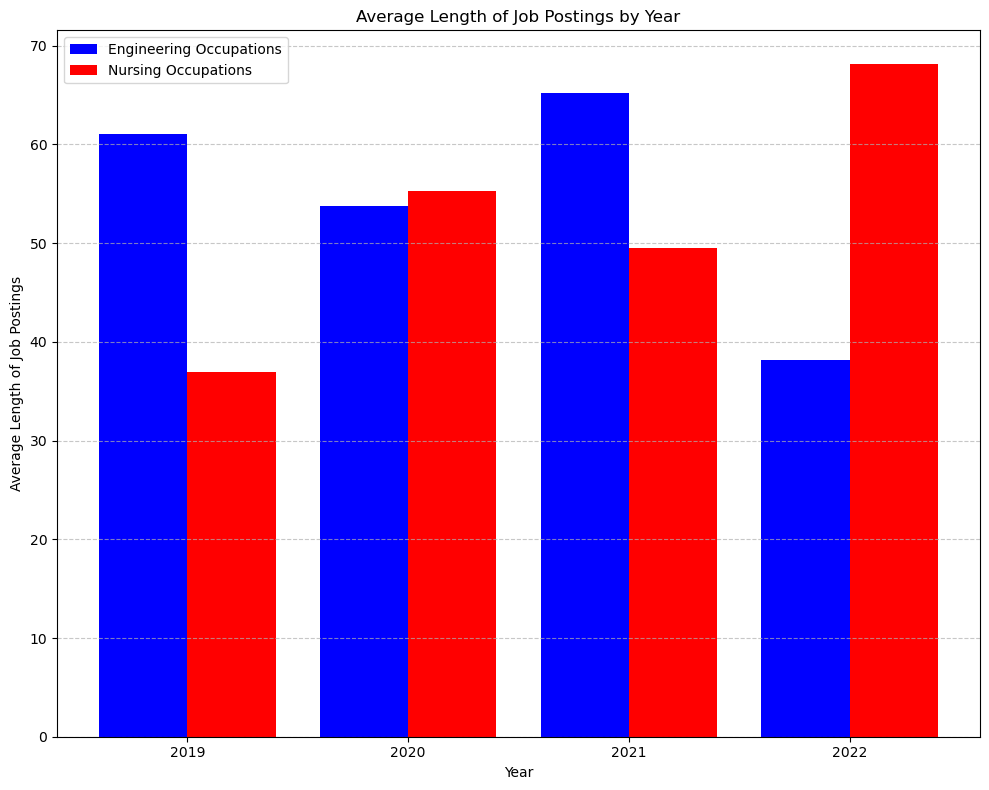

In [42]:
# graph the average length of job postings by year for both nursing and engineering occupations.
index = np.arange(len(all_years))

fig, ax = plt.subplots(figsize = (10, 8))
engineering_graph = ax.bar(index, average_length_engineering_2019, 0.4,color = 'blue',  label='Engineering Occupations')
nurse_graph = ax.bar(index + 0.4, average_length_nurse_2019, 0.4, color = 'red', label='Nursing Occupations')

ax.set_xlabel('Year')
ax.set_ylabel('Average Length of Job Postings')
ax.set_title('Average Length of Job Postings by Year')
ax.set_xticks(index + 0.4 / 2)
ax.set_xticklabels([str(year) for year in all_years]) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend()



plt.tight_layout()
plt.show()

In [43]:
fig.savefig('data_story_engineering_updated.pdf', dpi=300)

In [44]:
# find the percentage of remote positions available for engineer positions since 2019
remote_engineering = engineering.groupby(['year', 'remote_work_available']).size().unstack(fill_value = 0)
remote_engineering_2019 = remote_engineering.loc[2019:]
remote_engineering_2019['percentage_remote'] = remote_engineering_2019[1.0]/(remote_engineering_2019[1.0] + remote_engineering_2019[0.0])
remote_engineering_2019

/var/folders/my/k8vfhbn90612lmd_2_zn09jc0000gp/T/ipykernel_42036/1519511554.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remote_engineering_2019['percentage_remote'] = remote_engineering_2019[1.0]/(remote_engineering_2019[1.0] + remote_engineering_2019[0.0])


remote_work_available,0.0,1.0,percentage_remote
year,,,
2019,7531,34,0.004494
2020,7184,33,0.004573
2021,8448,61,0.007169
2022,5458,83,0.014979


In [45]:
# do the same as above but for nursing positions now
remote_nurse = nurse.groupby(['year', 'remote_work_available']).size().unstack(fill_value = 0)
remote_nurse_2019 = remote_nurse.loc[2019:]
remote_nurse_2019['percentage_remote'] = remote_nurse_2019[1.0]/(remote_nurse_2019[1.0] + remote_nurse_2019[0.0])
remote_nurse_2019


/var/folders/my/k8vfhbn90612lmd_2_zn09jc0000gp/T/ipykernel_42036/857045686.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remote_nurse_2019['percentage_remote'] = remote_nurse_2019[1.0]/(remote_nurse_2019[1.0] + remote_nurse_2019[0.0])


remote_work_available,0.0,1.0,percentage_remote
year,,,
2019,9207,24,0.002600
2020,11235,44,0.003901
2021,16796,61,0.003619
2022,12504,46,0.003665


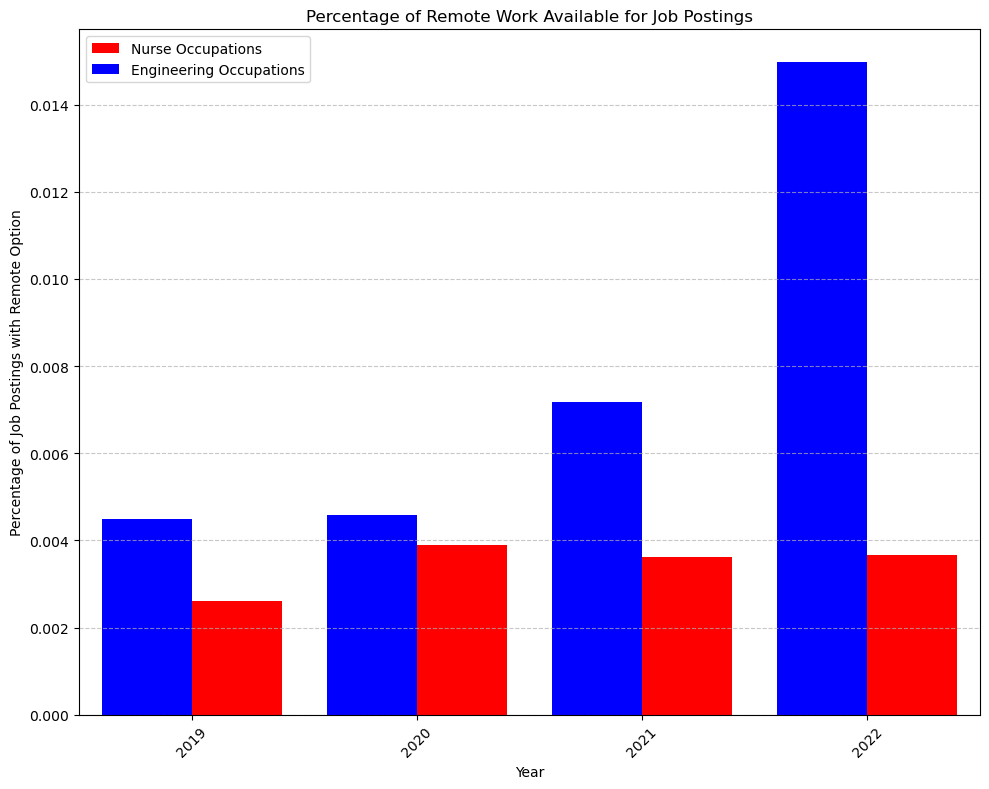

In [46]:
# create the subsequent graph that compares the percentage of remote work available for nursing and engineering
# positions
index = np.arange(len(all_years))

fig, ax = plt.subplots(figsize = (10, 8))
remote_nurse_2019['percentage_remote'].plot(kind = 'bar', color = 'red', position = 0, width = 0.4, label = "Nurse Occupations", ax = ax)
remote_engineering_2019['percentage_remote'].plot(kind = 'bar', color = 'blue', position = 1, width = 0.4, label = "Engineering Occupations", ax = ax)

ax.set_xlabel('Year')
ax.set_ylabel('Percentage of Job Postings with Remote Option')
ax.set_title('Percentage of Remote Work Available for Job Postings')
ax.set_xticklabels(remote_nurse_2019.index, rotation=45) 
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_xlim(left = -0.5, right = len(all_years) - 0.5)
plt.tight_layout()  
ax.legend()



plt.tight_layout()
plt.show()

In [47]:
fig.savefig('remote_comparison.pdf', dpi=300)